In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

tf.__version__

In [ ]:

# Checking if i have GPU Enabled
tf.test.is_gpu_available()

## Data Augumentation - Creating more data from existing data

In [2]:
# preprocessing is Resizing and Rescaling
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)
     

In [3]:
# dividing the data into training and validation
train=training_datagenarator.flow_from_directory('D:\Works\def\Training_data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('D:\Works\def\Training_data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation') 

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


 # CNN MODEL

In [4]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
cnn.summary()

## Compile and Train

In [ ]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('D:\Works\def\model\dl_model_2.h5',
                                             monitor='val_loss',
                                             mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [ ]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=5,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )
     

# TESTING

In [5]:
from tensorflow.keras.models import load_model
cnn=load_model('D:\Works\def\model\dl_model_2.h5')

In [ ]:
cnn.summary()

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

Input Image

In [10]:
#PICTURE OF OUR CHOICE TO TEST IT
image_for_testing=r'D:\Works\def\training_data\train_smoke\14.png'

"""
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()
"""

1/1 [==============================] - 0s 229ms/step


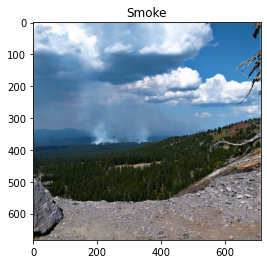

In [11]:
test_image = image.load_img(image_for_testing, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis=0)

# Predict probabilities for each class
probabilities = cnn.predict(test_image)

# Get the index of the class with the highest probability
#predicted_class_index = np.argmax(probabilities)

Categories = ['Fire', 'Smoke']

image_show = PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Categories[int(probabilities)])
plt.show()

To create a pickle file

In [ ]:
#instead of categories
#if result[0][0] == 0:
    #print("It is fire")
#else:
    #print("It is smoke")
!pip install pickle

In [ ]:
import pickle

In [ ]:
with open('cnn.pickle', 'wb') as file:
    pickle.dump(cnn, file)
    
with open('cnn.pickle', 'rb') as file:
    loaded_model = pickle.load(file)